In [112]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

Dataset info:

age - Individual's age
workclass - Employment status
fnlwgt - Short for "Final Weight", the number of people represented by the census
education & education-num - Individual's highest level of education
marital-status - Individual's marital status
occupation - Individual's occupation
relationship - Individual's relationship to others (i.e. spouse, child, parent, etc.)
race - Individual's race
sex - Individual's sex
capital-gain & capital-loss - Individual's capital gains and losses
hours-per-week - Number of hours worked by an individual
native-country - Individual's native country
income - Individual's income (more than or less than 50k)

In [113]:
df = pd.read_csv('C:/Users/Jrl31/OneDrive/Documents/PPL Final/census+income/adult.data')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [114]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [115]:
df_copy = df.copy()

df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

df.drop(df.index[df['capital-gain'] > 60000], inplace=True)
df.reset_index(drop=True, inplace=True)

df.replace(' >50K', 0, inplace=True)
df.replace(' <=50K', 1, inplace=True)

df.drop(['relationship'], axis=1, inplace=True)
df.drop(['fnlwgt'], axis=1, inplace=True)

#display(df)

#plt.scatter(df['capital-gain'], df['age'])
#plt.scatter(df['age'], df['capital-gain'])
#plt.scatter(df['hours-per-week'], df['age'])

Personal notes:

- Find the percentage of people of x age making over 50k
    - Find the number of people that are x age and make over 50k
    - (number that makes over 50k * 100) / total population = percent (or (n * 100) / t)
- Are you over or under the odds of making over 50k? 
    - Age group percent - Total population percent

- "You are x percent more likely to make over 50k if you are in this age group"

- Which category has the highest impact on the likelihood of making 50k?
    - Standard deviation(?)

Commented out to save space, un-comment to make the graphs

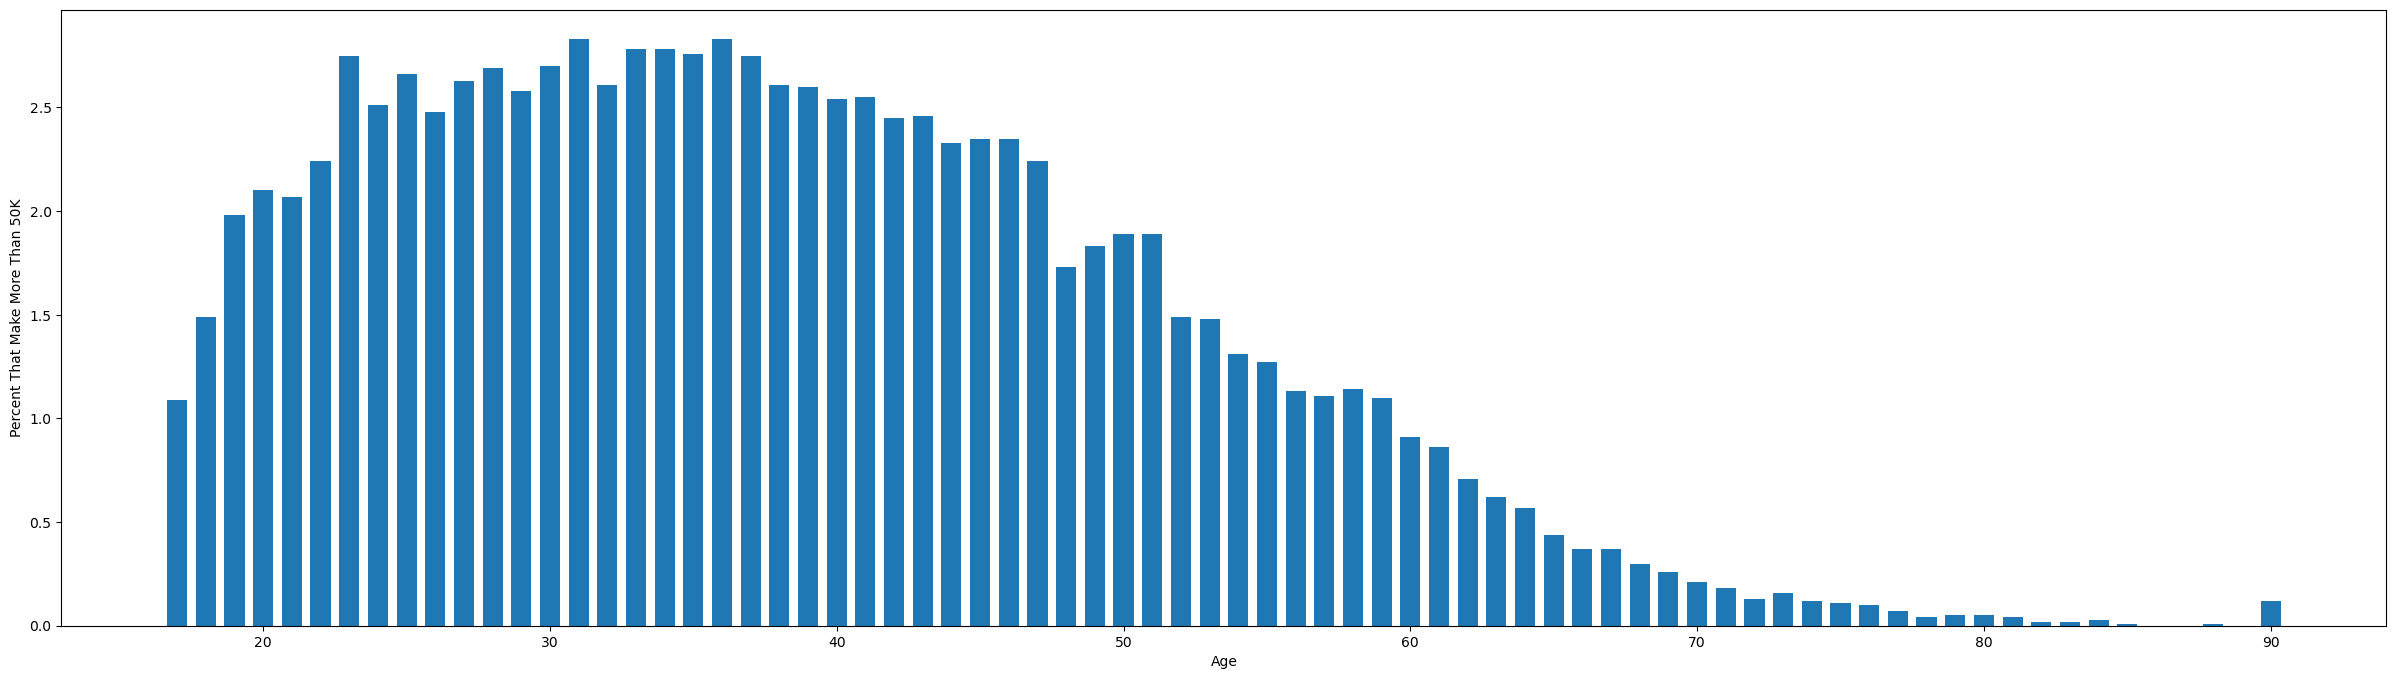

In [116]:
plt.figure(figsize = (30,8))

agegroups = df.groupby('age')['income'].agg(['mean', 'count']).reset_index()

agegroups['percent-over-50k'] = (agegroups['mean'] * 100).round(2)
agegroups['population-percent'] = ((agegroups['count'] / len(df)) * 100).round(2)

plt.bar(agegroups['age'], agegroups['population-percent'], width=0.7)

plt.xlabel("Age")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

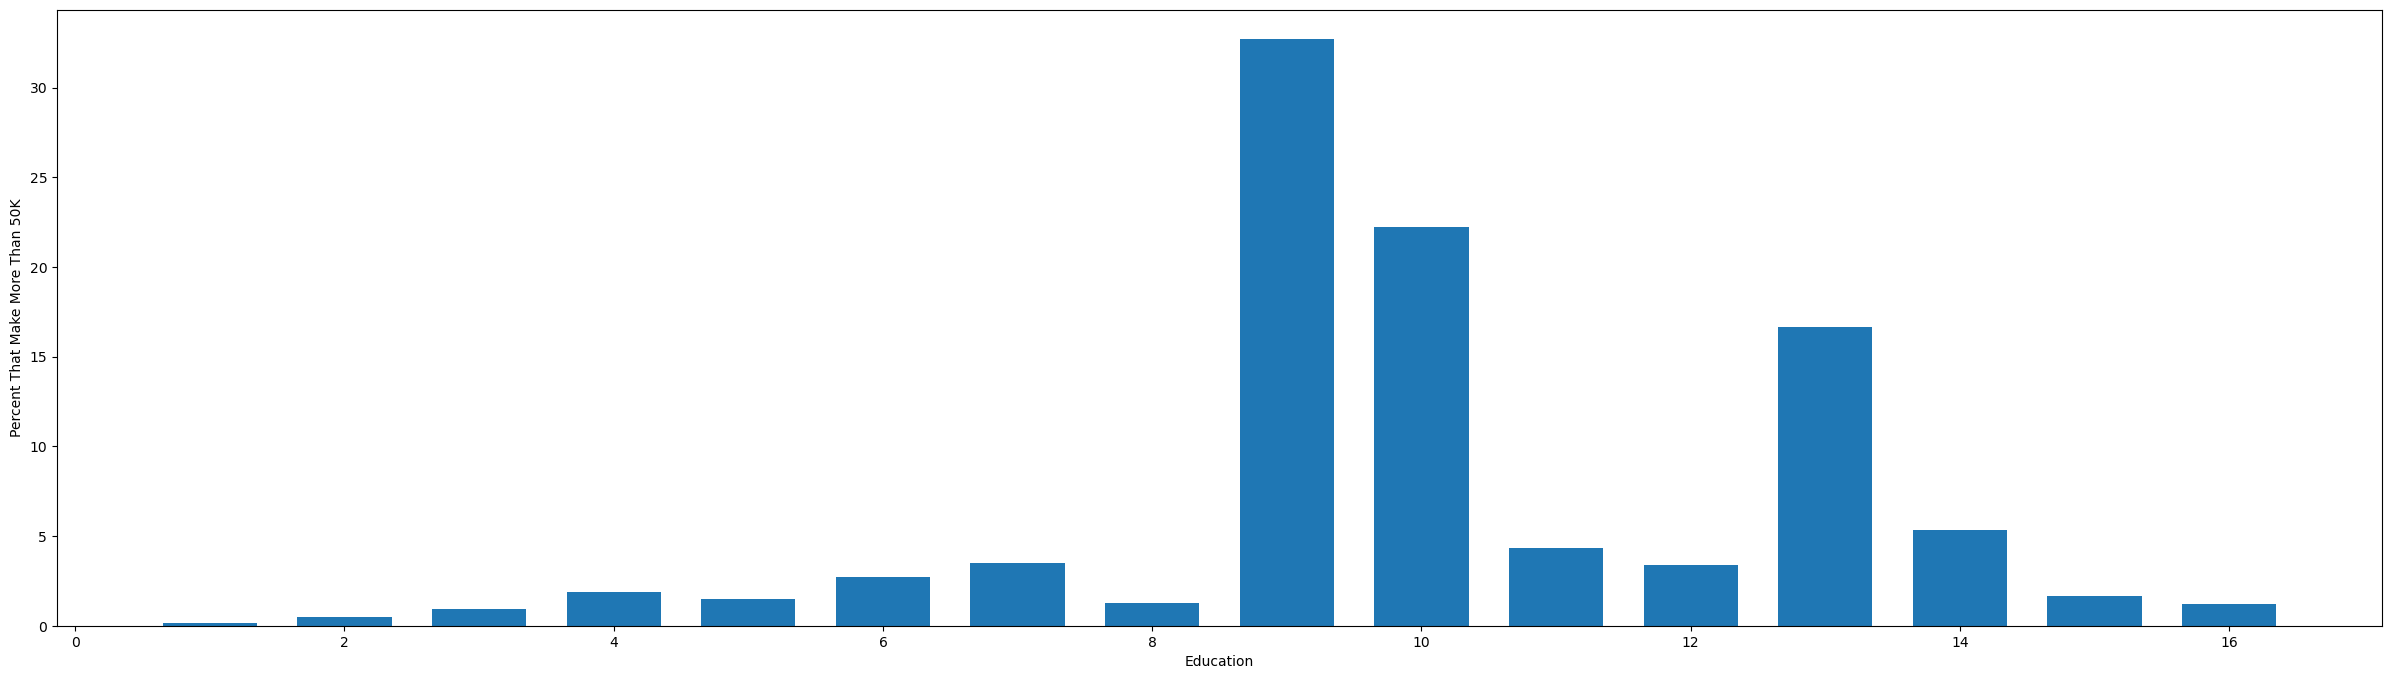

In [117]:
plt.figure(figsize = (30,8))

edgroups = df.groupby('education-num')['income'].agg(['mean', 'count']).reset_index()

edgroups['percent-over-50k'] = (edgroups['mean'] * 100).round(2)
edgroups['population-percent'] = ((edgroups['count'] / len(df)) * 100).round(2)

plt.bar(edgroups['education-num'], edgroups['population-percent'], width=0.7)

plt.xlabel("Education")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

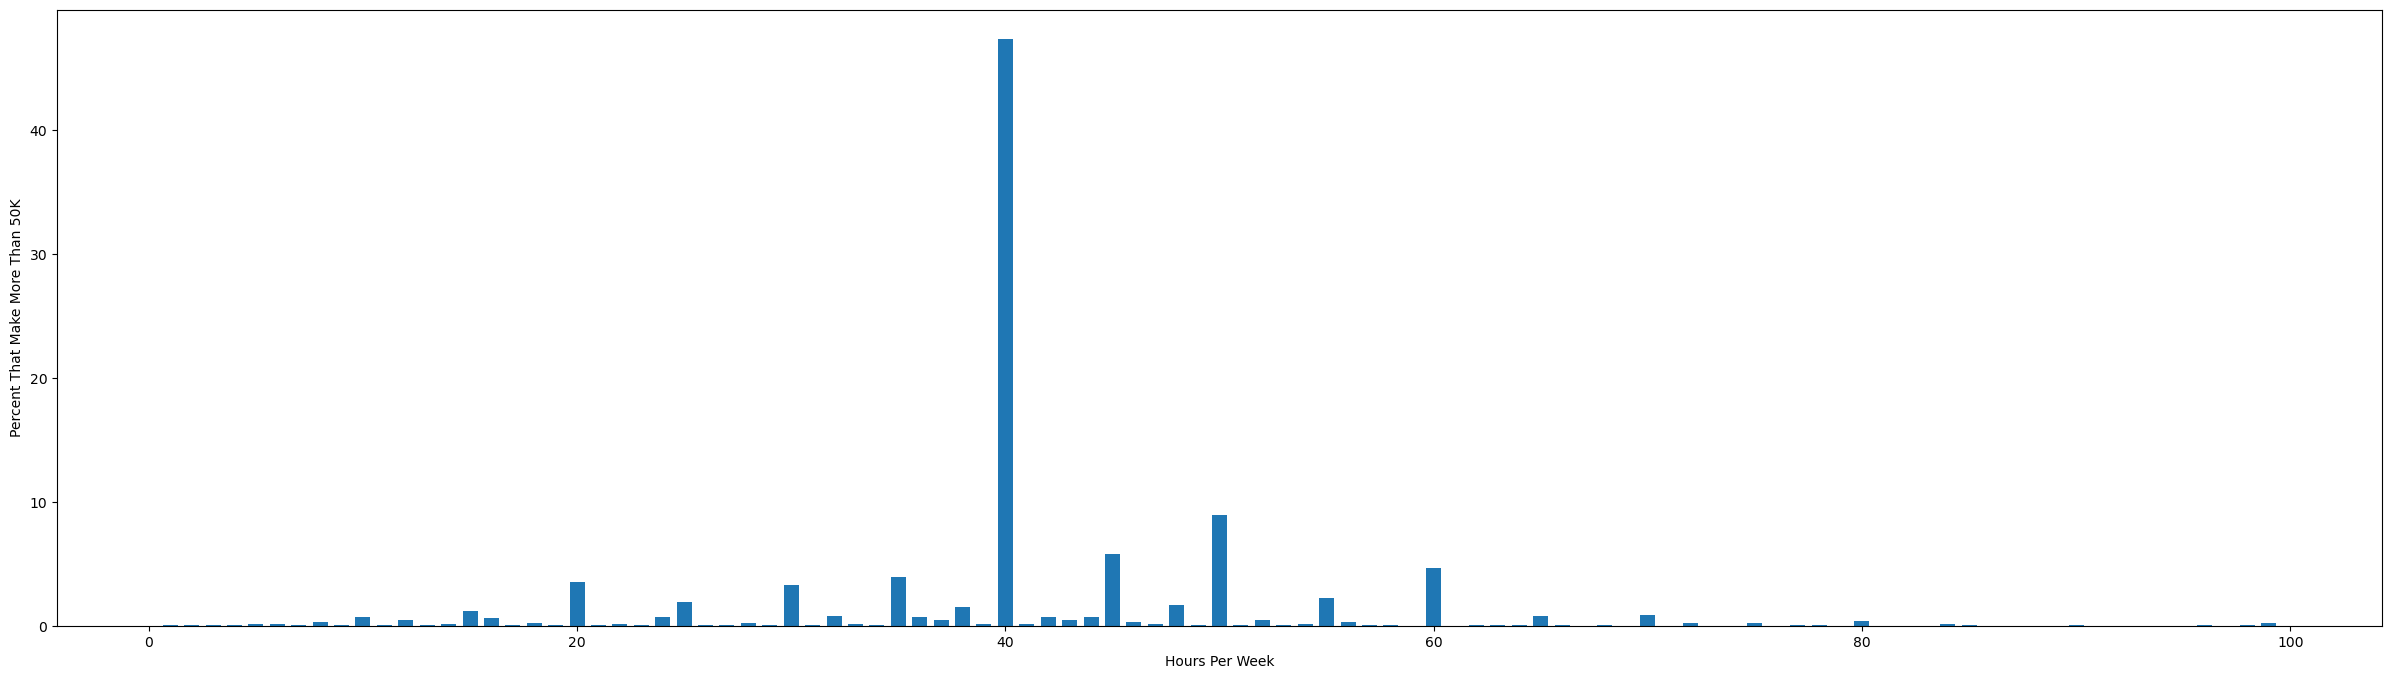

In [118]:
plt.figure(figsize = (30,8))

hoursgroups = df.groupby('hours-per-week')['income'].agg(['mean', 'count']).reset_index()

hoursgroups['percent-over-50k'] = (hoursgroups['mean'] * 100).round(2)
hoursgroups['population-percent'] = ((hoursgroups['count'] / len(df)) * 100).round(2)

plt.bar(hoursgroups['hours-per-week'], hoursgroups['population-percent'], width=0.7)

plt.xlabel("Hours Per Week")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

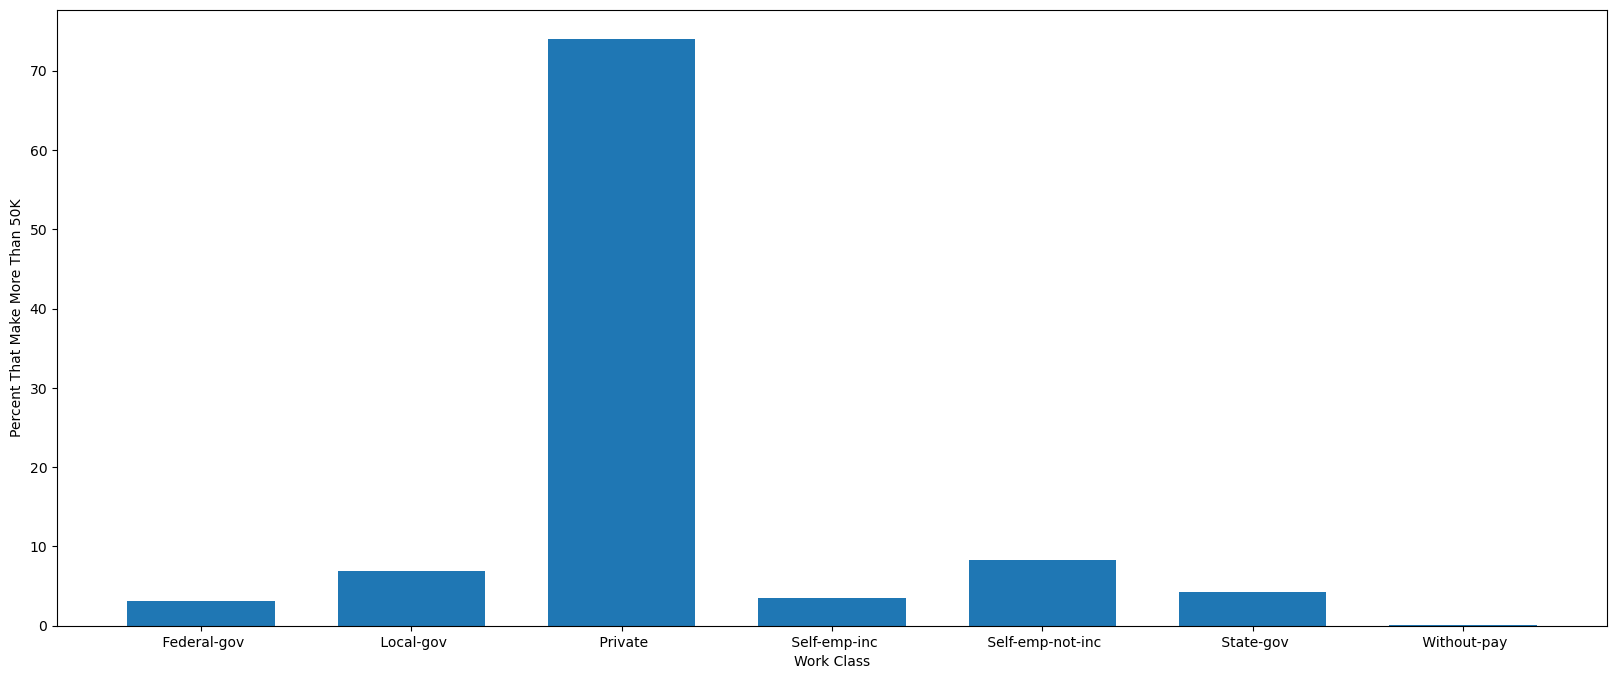

In [119]:
plt.figure(figsize = (20,8))

classgroups = df.groupby('workclass')['income'].agg(['mean', 'count']).reset_index()

classgroups['percent-over-50k'] = (classgroups['mean'] * 100).round(2)
classgroups['population-percent'] = ((classgroups['count'] / len(df)) * 100).round(2)

plt.bar(classgroups['workclass'], classgroups['population-percent'], width=0.7)

plt.xlabel("Work Class")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

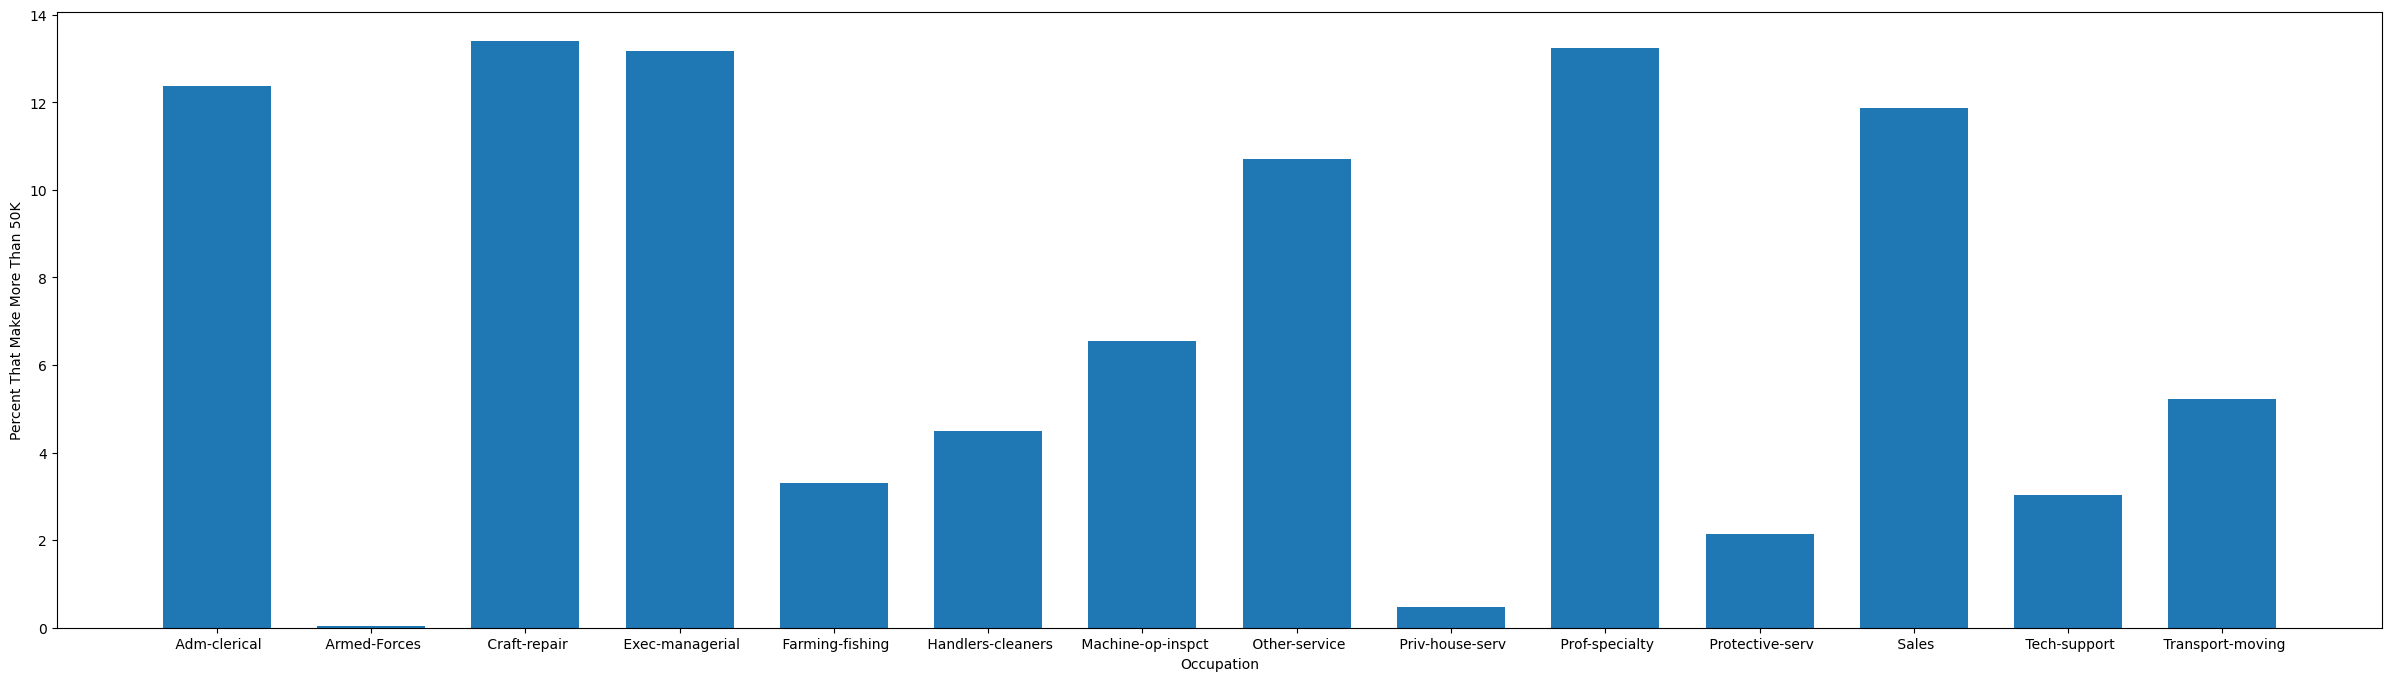

In [120]:
plt.figure(figsize = (30,8))

jobgroups = df.groupby('occupation')['income'].agg(['mean', 'count']).reset_index()

jobgroups['percent-over-50k'] = (jobgroups['mean'] * 100).round(2)
jobgroups['population-percent'] = ((jobgroups['count'] / len(df)) * 100).round(2)

plt.bar(jobgroups['occupation'], jobgroups['population-percent'], width=0.7)

plt.xlabel("Occupation")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

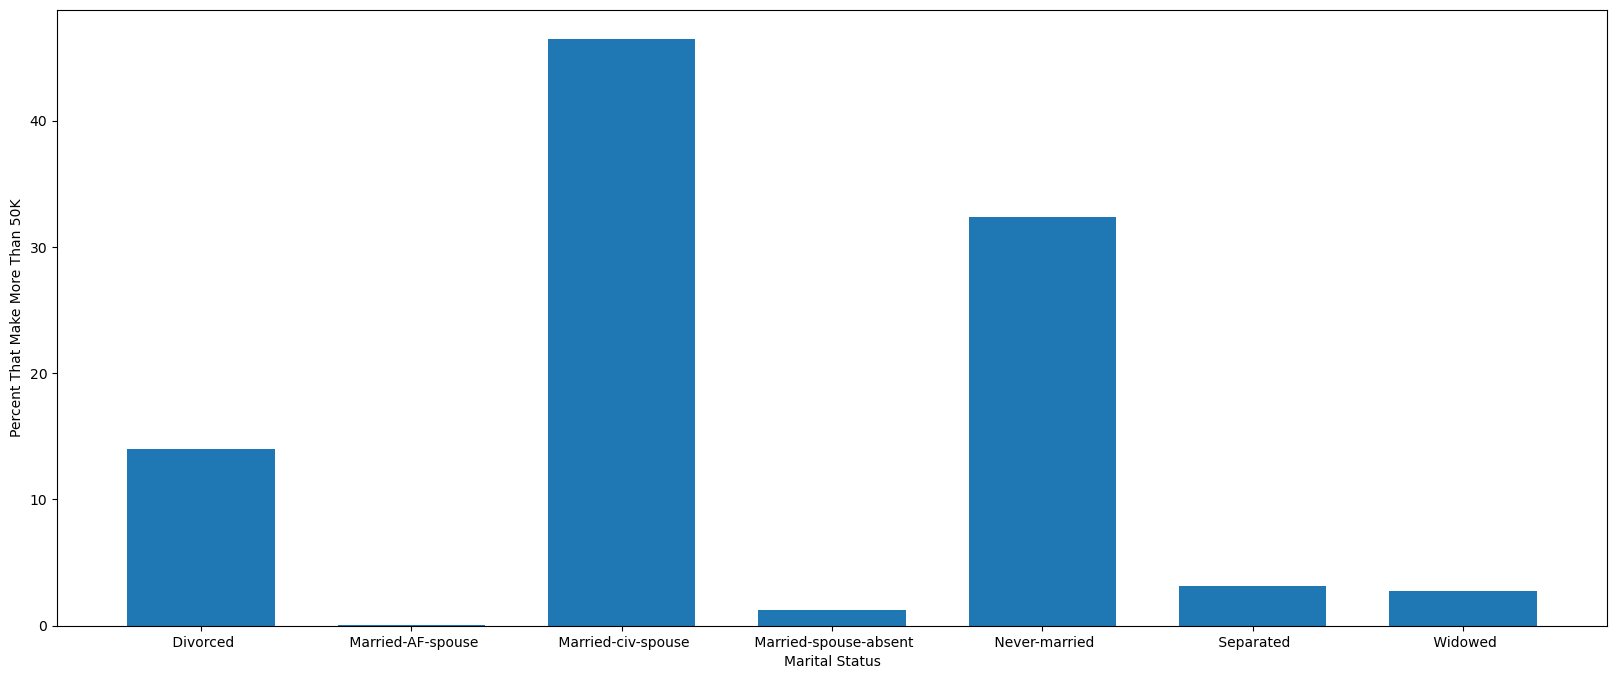

In [121]:
plt.figure(figsize = (20,8))

marrygroups = df.groupby('marital-status')['income'].agg(['mean', 'count']).reset_index()

marrygroups['percent-over-50k'] = (marrygroups['mean'] * 100).round(2)
marrygroups['population-percent'] = ((marrygroups['count'] / len(df)) * 100).round(2)

plt.bar(marrygroups['marital-status'], marrygroups['population-percent'], width=0.7)

plt.xlabel("Marital Status")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

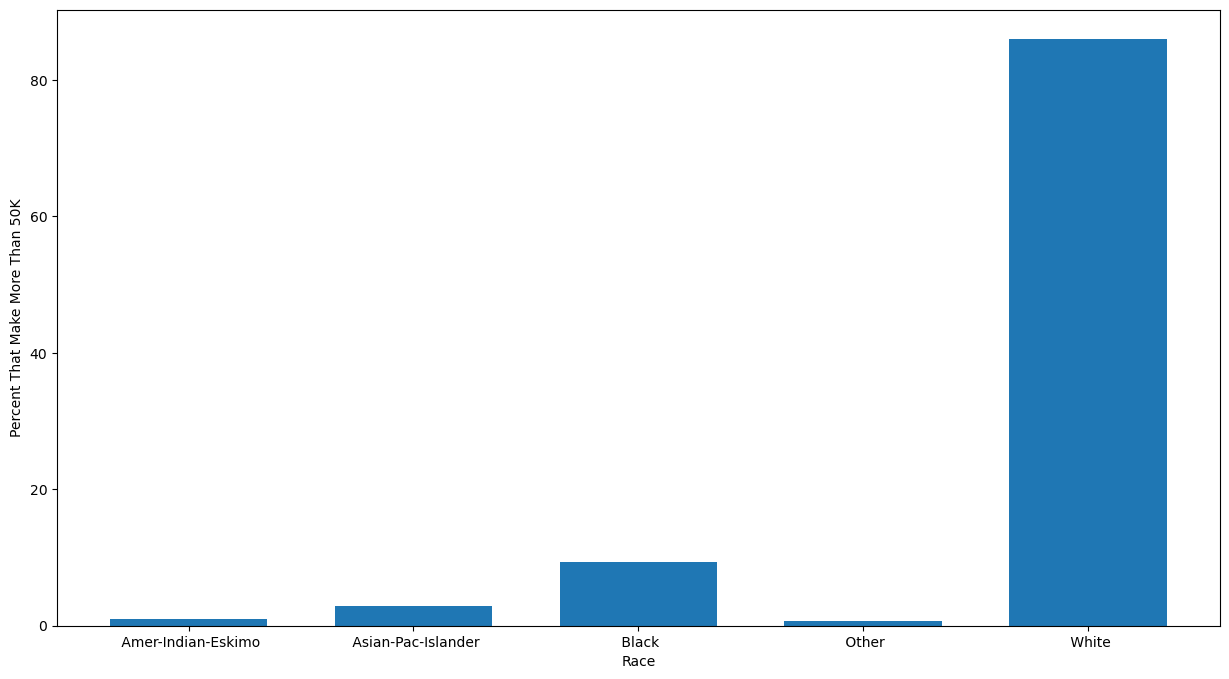

In [122]:
plt.figure(figsize = (15,8))

racegroups = df.groupby('race')['income'].agg(['mean', 'count']).reset_index()

racegroups['percent-over-50k'] = (racegroups['mean'] * 100).round(2)
racegroups['population-percent'] = ((racegroups['count'] / len(df)) * 100).round(2)

plt.bar(racegroups['race'], racegroups['population-percent'], width=0.7)

plt.xlabel("Race")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

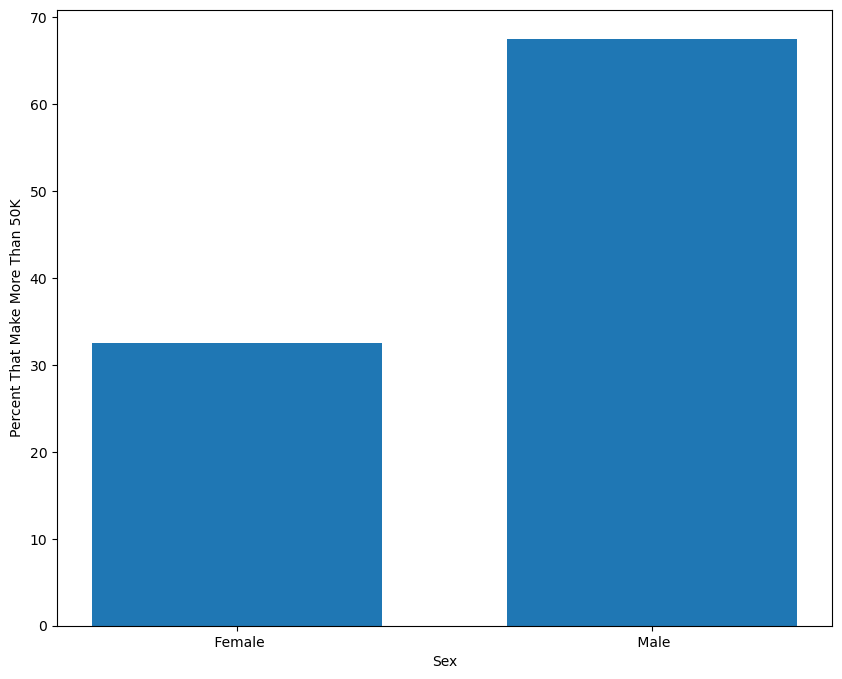

In [123]:
plt.figure(figsize = (10,8))

sgroups = df.groupby('sex')['income'].agg(['mean', 'count']).reset_index()

sgroups['percent-over-50k'] = (sgroups['mean'] * 100).round(2)
sgroups['population-percent'] = ((sgroups['count'] / len(df)) * 100).round(2)

plt.bar(sgroups['sex'], sgroups['population-percent'], width=0.7)

plt.xlabel("Sex")
plt.ylabel("Percent That Make More Than 50K")
plt.show()

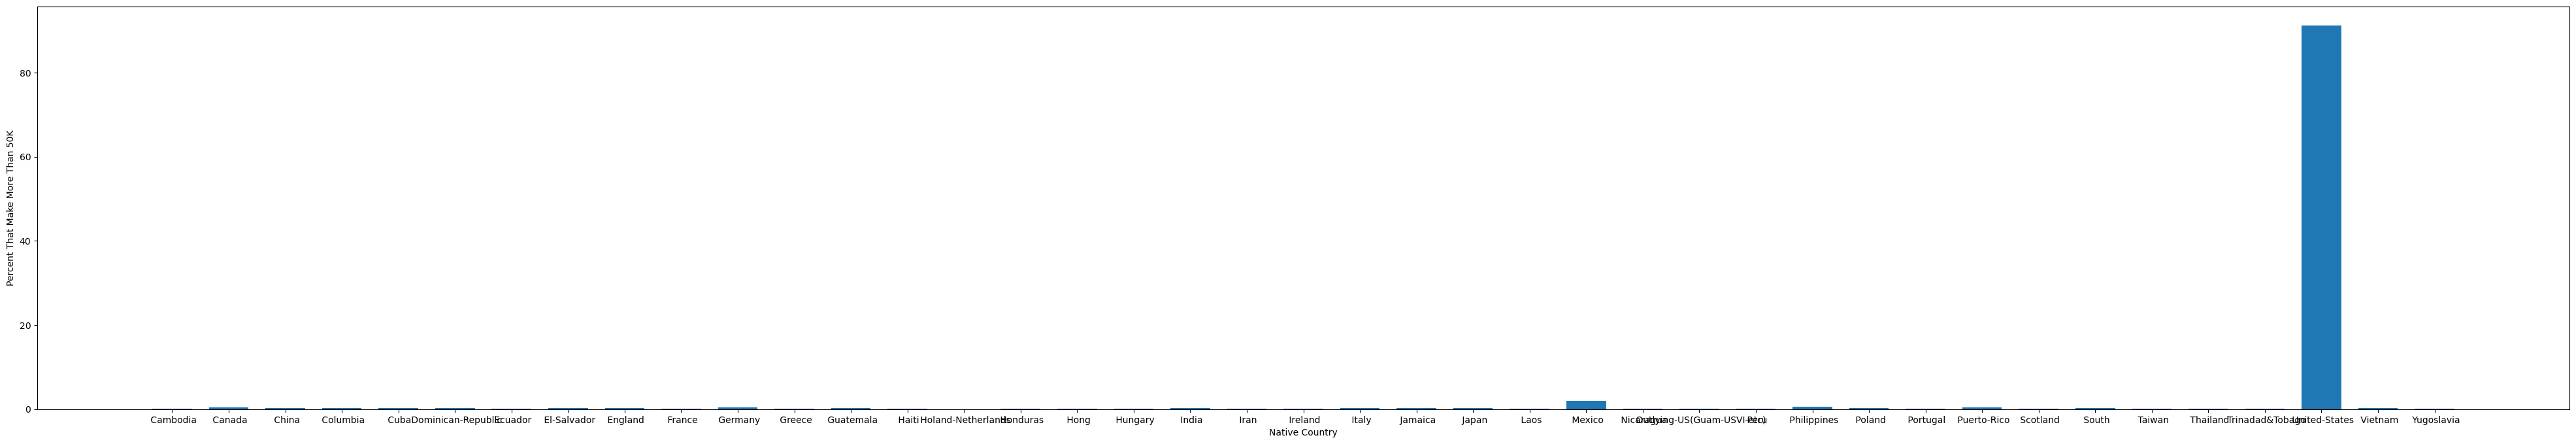

In [124]:
plt.figure(figsize = (50,8))

countrygroups = df.groupby('native-country')['income'].agg(['mean', 'count']).reset_index()

countrygroups['percent-over-50k'] = (countrygroups['mean'] * 100).round(2)
countrygroups['population-percent'] = ((countrygroups['count'] / len(df)) * 100).round(2)

plt.bar(countrygroups['native-country'], countrygroups['population-percent'], width=0.7)

plt.xlabel("Native Country")
plt.ylabel("Percent That Make More Than 50K")
plt.show()